# Cleaning, Analysis, Visualization Walkthrough

[The Austin Animal Shelter Intakes and Outcomes Dataset](https://www.kaggle.com/datasets/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes)

[Reference: Dan Poynor](https://github.com/danpoynor/pet-shelter-data-analysis-notebook)

In [1]:
# import the things
import pandas as pd
import os

In [2]:
# read csvs from path and create data frames
intakes= r'/Users/brandanscully/Documents/GitHub/DATA_510/aac_intakes.csv'
outcomes= r'/Users/brandanscully/Documents/GitHub/DATA_510/aac_outcomes.csv'

df_i = pd.read_csv(intakes)
df_o = pd.read_csv(outcomes)

In [3]:
# inspect intakes dataframe
df_i.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


Note that datetime and datetime2 are both datetime, but appear to be redundant.

In [4]:
#inspect outcomes data frame
df_o.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


Note that datetime and monthyear are in datetime but appear to be redundant.

Note that date_of_birth appears to use datetime format when date would suffice.

In [5]:
#inspect df dimensions
df_i.shape, df_o.shape

((80187, 12), (80681, 12))

Note, data frames have differing number of records, same number of columns.

In [6]:
#deduplicate rows and check the resulting lengths
df_i.drop_duplicates(keep='first', inplace=True)
df_o.drop_duplicates(keep='first', inplace=True)

len(df_i), len(df_o)

(80161, 80671)

That removed 26 rows from df_i and 10 rows from df_o.

In [7]:
#inspect resulting df_i
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80161 entries, 0 to 80186
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_intake   80161 non-null  object
 1   animal_id         80161 non-null  object
 2   animal_type       80161 non-null  object
 3   breed             80161 non-null  object
 4   color             80161 non-null  object
 5   datetime          80161 non-null  object
 6   datetime2         80161 non-null  object
 7   found_location    80161 non-null  object
 8   intake_condition  80161 non-null  object
 9   intake_type       80161 non-null  object
 10  name              55586 non-null  object
 11  sex_upon_intake   80160 non-null  object
dtypes: object(12)
memory usage: 8.0+ MB


In [8]:
#inspect resulting df_o
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80671 entries, 0 to 80680
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  80663 non-null  object
 1   animal_id         80671 non-null  object
 2   animal_type       80671 non-null  object
 3   breed             80671 non-null  object
 4   color             80671 non-null  object
 5   date_of_birth     80671 non-null  object
 6   datetime          80671 non-null  object
 7   monthyear         80671 non-null  object
 8   name              56111 non-null  object
 9   outcome_subtype   36888 non-null  object
 10  outcome_type      80657 non-null  object
 11  sex_upon_outcome  80669 non-null  object
dtypes: object(12)
memory usage: 8.0+ MB


In [9]:
#these are the columns that are in df_i but not df_o
set(df_i.columns) - set(df_o.columns)

{'age_upon_intake',
 'datetime2',
 'found_location',
 'intake_condition',
 'intake_type',
 'sex_upon_intake'}

In [10]:
#these are the columns that are in df_o but not df_i
set(df_o.columns) - set(df_i.columns)

{'age_upon_outcome',
 'date_of_birth',
 'monthyear',
 'outcome_subtype',
 'outcome_type',
 'sex_upon_outcome'}

In [11]:
#inspect df_i statistics
df_i.describe()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
count,80161,80161,80161,80161,80161,80161,80161,80161,80161,80161,55586,80160
unique,46,72365,5,2166,529,57055,57055,36772,8,5,14731,5
top,1 year,A721033,Dog,Domestic Shorthair Mix,Black/White,2016-09-23T12:00:00.000,2016-09-23T12:00:00.000,Austin (TX),Normal,Stray,Bella,Intact Male
freq,14664,13,45730,23513,8338,64,64,14437,70498,56264,357,25480


Note that there are 72,365 unique animal_id values of 80187 records.

Note datetime and datetime2 appear to be redundant.

In [12]:
#inspect df_o statistics
df_o.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,80663,80671,80671,80671,80671,80671,80671,80671,56111,36888,80657,80669
unique,46,72877,5,2176,532,5956,66474,66474,14824,19,9,5
top,1 year,A721033,Dog,Domestic Shorthair Mix,Black/White,2015-09-01T00:00:00,2016-04-18T00:00:00,2016-04-18T00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14910,13,45854,23814,8395,112,39,39,362,20081,34228,28697


Note that there are 72877 unique animal_id values of 80681 records. Compare to 72,365 uniques in df_i.

Note datetime and monthyear fields appear to be redundant.

We'll address the redundant columns using Pandas' [transpose](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html) method.

We first use .T method to transpose each data frame.
This turns rows to columns.
We then drop_duplicates as before, and .T again to undo our original .T

I originally tried this with the inplace=True argument and got an error related to None values. It worked with variable assignment.

In [13]:
df_i = df_i.T.drop_duplicates().T
df_o = df_o.T.drop_duplicates().T

df_i.shape[1], df_o.shape[1]

(11, 11)

Each data frame lost one column.

Let's check to see if there are unique pairs of animal_id and name (there should be).

In [14]:
"""
We're going to use .groupby to give us an index of 'animal_id'.
We're then going to call the 'name' field and generate a list of 
unique names for the index.
Once we have a list of names for each 'animal_id', 
we will apply len() to the list.
This will result in a series of unique names per 'animal_id'.
We'll sort that to see if there are more than one name per id.
"""
df_i.groupby(['animal_id'])['name'].unique().apply(lambda x:len(x)).sort_values()

animal_id
A006100    1
A731344    1
A731345    1
A731346    1
A731350    1
          ..
A695520    1
A695519    1
A695516    1
A695525    1
A769067    1
Name: name, Length: 72365, dtype: int64

In [19]:
#same deal for df_o
df_o.groupby(['animal_id'])['name'].unique().apply(lambda x:len(x)).sort_values()

animal_id
A006100    1
A730697    1
A730698    1
A730699    1
A730700    1
          ..
A694467    1
A694466    1
A694465    1
A694471    1
A769323    1
Name: name, Length: 72877, dtype: int64

Looks good. Let's merge!

In [20]:
#df_i becomes left

df_i_o = df_i.merge(
    df_o,
    left_on=['name', 'animal_id', 'animal_type', 'breed', 'color'],
    right_on=['name', 'animal_id', 'animal_type', 'breed', 'color'],
    suffixes=('_intake', '_outcome')
)

In [21]:
#inspect the resulting dataframe
df_i_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100096 entries, 0 to 100095
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   age_upon_intake   100096 non-null  object
 1   animal_id         100096 non-null  object
 2   animal_type       100096 non-null  object
 3   breed             100096 non-null  object
 4   color             100096 non-null  object
 5   datetime_intake   100096 non-null  object
 6   found_location    100096 non-null  object
 7   intake_condition  100096 non-null  object
 8   intake_type       100096 non-null  object
 9   name              75148 non-null   object
 10  sex_upon_intake   100095 non-null  object
 11  age_upon_outcome  100093 non-null  object
 12  date_of_birth     100096 non-null  object
 13  datetime_outcome  100096 non-null  object
 14  outcome_subtype   39677 non-null   object
 15  outcome_type      100080 non-null  object
 16  sex_upon_outcome  100094 non-null  obj

Initially, each data frame used 8.0+MB of memory. Combined memory is downt to 13.7+MB (savings!).

We have some datetime fields that are being stored as objects, so we'll need to convert those if we want to use them.

It looks like there are some null values primarily in names and outcome_subtypes. Also outcome_type, sex_upon_intake, age_upon_outcome.

Let's take a look at those.

In [22]:
#start with NaN names
df_i_o[df_i_o.name.isna()].head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime_intake,found_location,intake_condition,intake_type,name,sex_upon_intake,age_upon_outcome,date_of_birth,datetime_outcome,outcome_subtype,outcome_type,sex_upon_outcome
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female,4 weeks,2013-09-21T00:00:00,2013-10-21T11:39:00,Partner,Transfer,Intact Female
10,2 years,A760053,Dog,Chihuahua Shorthair,White/Tan,2017-10-11T15:46:00.000,8800 South First Street in Austin (TX),Normal,Stray,NaN,Intact Male,2 years,2015-10-11T00:00:00,2017-10-15T18:30:00,NaN,Adoption,Neutered Male
13,2 years,A743114,Cat,Domestic Shorthair Mix,Black/White,2017-02-04T10:10:00.000,208 Beaver St in Austin (TX),Injured,Stray,NaN,Intact Female,2 years,2015-02-04T00:00:00,2017-02-04T10:48:00,Suffering,Euthanasia,Intact Female
18,2 months,A697950,Dog,Australian Cattle Dog/Labrador Retriever,Tan/White,2015-03-04T11:22:00.000,1501 S Fm 973 in Austin (TX),Normal,Stray,NaN,Intact Female,2 months,2014-12-20T00:00:00,2015-03-08T18:55:00,NaN,Adoption,Spayed Female
21,5 months,A682230,Dog,Maltese Mix,White,2014-06-25T16:27:00.000,3737 Keats Dr in Austin (TX),Normal,Stray,NaN,Intact Female,6 months,2013-12-25T00:00:00,2014-06-29T17:26:00,Partner,Transfer,Spayed Female


In [29]:
df_o[df_o['animal_id']=='A683115']

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [23]:
#let's set NaN names to Unknown.
df_i_o['name'].fillna('Unknown', inplace=True)

In [32]:
"""
on to outcome_subtype.
we'll use a sample of 10 here instead of head.
This should let us see a cross section of possible outcomes 
and their subtypes.
"""
df_i_o[df_i_o.outcome_subtype.isna()].sample(10)

,age_upon_intake,animal_id,animal_type,breed,color,datetime_intake,found_location,intake_condition,intake_type,name,sex_upon_intake,age_upon_outcome,date_of_birth,datetime_outcome,outcome_subtype,outcome_type,sex_upon_outcome
249,2 years,A759430,Dog,Labrador Retriever Mix,Black/White,2017-10-01T19:03:00.000,Rosehill Circle And Stassney in Austin (TX),Normal,Stray,*Whitney,Spayed Female,2 years,2015-10-02T00:00:00,2017-10-28T12:06:00,NaN,Adoption,Spayed Female
67396,15 years,A682854,Dog,Labrador Retriever Mix,Yellow,2014-07-03T18:05:00.000,24001 Pedernales Drive in Travis (TX),Aged,Stray,Kaui,Spayed Female,15 years,1999-07-06T00:00:00,2014-07-06T12:49:00,NaN,Return to Owner,Spayed Female
49921,4 years,A680761,Dog,Miniature Poodle Mix,White,2014-06-07T14:12:00.000,Austin (TX),Normal,Public Assist,Chucho,Neutered Male,4 years,2010-06-07T00:00:00,2014-06-10T15:13:00,NaN,Return to Owner,Neutered Male
25984,1 year,A666665,Dog,Labrador Retriever/Australian Shepherd,White/Tan,2013-11-05T14:05:00.000,10709 Lafayette Park Dr. in Jonestown (TX),Normal,Stray,*Murphy,Intact Male,1 year,2012-11-05T00:00:00,2013-11-10T17:34:00,NaN,Adoption,Neutered Male
57900,4 years,A690998,Dog,Miniature Poodle Mix,White,2015-10-30T22:47:00.000,7700 Katydid Dr in Austin (TX),Normal,Stray,Bon Bon,Neutered Male,4 years,2011-10-28T00:00:00,2015-11-01T12:17:00,NaN,Return to Owner,Neutered Male
73579,2 months,A710897,Cat,Domestic Shorthair Mix,Orange Tabby,2015-08-29T14:13:00.000,16700 Trevin Cv in Manor (TX),Normal,Stray,*Origami,Intact Male,2 months,2015-06-14T00:00:00,2015-09-04T15:53:00,NaN,Adoption,Neutered Male
12359,5 years,A572004,Dog,Labrador Retriever/Border Collie,Tricolor,2015-12-26T15:11:00.000,Mc Clannahan And Synder in Travis (TX),Normal,Stray,Raven,Spayed Female,4 years,2010-03-05T00:00:00,2014-06-16T14:19:00,NaN,Return to Owner,Spayed Female
63865,1 year,A747627,Other,Rabbit Sh Mix,Brown/White,2017-04-22T13:04:00.000,403 E Ben White Blvd in Austin (TX),Normal,Stray,*Dill,Intact Male,1 year,2016-04-22T00:00:00,2017-04-29T13:06:00,NaN,Adoption,Neutered Male
26742,8 months,A691155,Dog,Labrador Retriever/Australian Cattle Dog,Black/White,2014-10-30T17:26:00.000,Austin (TX),Normal,Public Assist,Clyde,Intact Male,9 months,2014-01-30T00:00:00,2014-11-09T13:38:00,NaN,Return to Owner,Intact Male
99492,1 year,A750065,Dog,Pit Bull Mix,Tricolor,2017-07-22T14:29:00.000,Austin (TX),Normal,Owner Surrender,Millie,Spayed Female,1 year,2016-05-23T00:00:00,2017-05-28T19:10:00,NaN,Adoption,Spayed Female


It seems the 'Return to Owner' and 'Adoption' outcomes have no associated subtypes. This is fine. Note it makes sense for the outcome_type to come before outcome_subtype.

Let's take a look at the outcome_type using our animal_id approach to make sure we're not missing anything.

In [33]:
df_o.groupby(['outcome_type'])['outcome_subtype'].unique()

outcome_type
Adoption                                [nan, Offsite, Foster, Barn]
Died               [nan, In Kennel, At Vet, In Foster, Enroute, I...
Disposal                                                       [nan]
Euthanasia         [Rabies Risk, Aggressive, Suffering, Medical, ...
Missing                  [In Foster, nan, Possible Theft, In Kennel]
Relocate                                                       [nan]
Return to Owner                                        [nan, At Vet]
Rto-Adopt                                                      [nan]
Transfer                                  [Partner, SCRP, Barn, Snr]
Name: outcome_subtype, dtype: object

The sample approach missed "Died", "Disposal", "Relocate", "Rto-Adopt", "Missing", and possibly "Euthanasia".

There's another way to approach this problem.

In [34]:
df_i_o[df_i_o.outcome_subtype.isna()].outcome_type.unique()

array(['Return to Owner', 'Adoption', 'Died', 'Disposal', 'Rto-Adopt',
       nan, 'Euthanasia', 'Missing', 'Relocate'], dtype=object)

This makes it look like there are some nan outcome_type values.

We should look at these. Let's start with shape.

In [35]:
df_i_o[df_i_o.outcome_type.isna()].shape

(16, 17)

Small enough that jupyter should show us the whole table.

In [36]:
df_i_o[df_i_o.outcome_type.isna()]

,age_upon_intake,animal_id,animal_type,breed,color,datetime_intake,found_location,intake_condition,intake_type,name,sex_upon_intake,age_upon_outcome,date_of_birth,datetime_outcome,outcome_subtype,outcome_type,sex_upon_outcome
1500,10 years,A718046,Dog,Chihuahua Longhair Mix,Cream,2016-03-26T14:22:00.000,12601 Bee Caves Pkwy #203 in Travis (TX),Normal,Public Assist,Bailey,Neutered Male,10 years,2005-12-20T00:00:00,2016-03-26T00:00:00,NaN,NaN,Neutered Male
1502,10 years,A718046,Dog,Chihuahua Longhair Mix,Cream,2015-12-20T12:32:00.000,Travis (TX),Normal,Owner Surrender,Bailey,Neutered Male,10 years,2005-12-20T00:00:00,2016-03-26T00:00:00,NaN,NaN,Neutered Male
29489,1 year,A671017,Other,Fox Mix,Brown/Black,2014-01-17T12:46:00.000,10105 Falcon Ridge Dr. in Travis (TX),Sick,Wildlife,Unknown,Unknown,1 year,2013-01-17T00:00:00,2014-01-20T08:27:00,NaN,NaN,Unknown
36699,1 year,A686025,Other,Bat Mix,Brown,2014-08-15T18:48:00.000,12901 N Ih 35 #1100 in Austin (TX),Normal,Wildlife,Unknown,Unknown,1 year,2013-08-15T00:00:00,2014-08-16T08:35:00,NaN,NaN,Unknown
40642,1 year,A737930,Dog,Pit Bull Mix,Fawn/White,2017-01-18T12:48:00.000,Austin (TX),Injured,Owner Surrender,King,Intact Male,10 months,2016-01-08T00:00:00,2016-11-17T10:59:00,NaN,NaN,Intact Male
40644,10 months,A737930,Dog,Pit Bull Mix,Fawn/White,2016-11-09T15:01:00.000,Austin (TX),Normal,Public Assist,King,Intact Male,10 months,2016-01-08T00:00:00,2016-11-17T10:59:00,NaN,NaN,Intact Male
44690,3 years,A737705,Dog,Labrador Retriever Mix,Black/White,2016-11-02T20:15:00.000,1607 Barney in Austin (TX),Normal,Stray,*Heddy,Intact Female,NaN,2013-11-02T00:00:00,2016-11-19T16:35:00,NaN,NaN,NaN
57026,4 weeks,A755711,Cat,Domestic Shorthair Mix,Black,2017-08-07T14:02:00.000,West Canyon Ridge Drive And North Interstate 3...,Normal,Stray,*Dewey,Intact Male,1 month,2017-07-06T00:00:00,2017-08-21T10:09:00,NaN,NaN,Intact Male
57028,2 months,A755711,Cat,Domestic Shorthair Mix,Black,2017-09-06T14:44:00.000,9913 Childress Drive in Austin (TX),Normal,Stray,*Dewey,Intact Male,1 month,2017-07-06T00:00:00,2017-08-21T10:09:00,NaN,NaN,Intact Male
70899,4 weeks,A755716,Cat,Domestic Shorthair Mix,Blue,2017-08-07T16:32:00.000,West Canyon Ridge And North Interstate 35 in A...,Normal,Stray,*Huey,Intact Female,1 month,2017-07-06T00:00:00,2017-08-21T10:09:00,NaN,NaN,Intact Female


Woah. More than cats and dogs, but the animal types are being saved as breeds with animal_type 'Other'. 

Note some * in the name field. That field could use some cleaning.

Let's see how many animal types are in the data set.

In [37]:
df_i_o[df_i_o.animal_type=='Other'].groupby(['breed'])['name'].count().sort_values(ascending=False)

breed
Bat Mix               1379
Bat                    827
Raccoon Mix            471
Rabbit Sh Mix          301
Raccoon                235
                      ... 
Polish Mix               1
Otter Mix                1
Himalayan Mix            1
Lop-Amer Fuzzy Mix       1
American                 1
Name: name, Length: 97, dtype: int64

Ok. 97 unique breeds of "Other" animal_types.

Bats, raccoons, and rabbits seem to be the most popular.

It looks like there is some ambiguity in the breed descriptions.

In [38]:
#for completeness
df_i_o['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

We learned a few things here.

* The name field could use some cleaning
* Some outcome_types have no associated outcome_subtype.
* Some outcome_types clustered in animal_type='Other' are NaN and appear to have NaN outcome_subtype.
* There's some ambiguity in the breed field for animal_type='Other'
* The rest of the breed field is probably worth investigating/cleaning.

# Let's discuss how we should handle these.

In [ ]:
#Fix the data here.

Let's engineer some features, starting with stay_duration.

First, we're going to need to convert datetimes stored as objects to datetimes. 

Here's the [pandas datetime docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

Here's a [datetime reference](https://towardsdatascience.com/10-tricks-for-converting-numbers-and-strings-to-datetime-in-pandas-82a4645fc23d).

In [39]:
df_i_o = df_i_o.astype({
    'datetime_intake': 'datetime64',
    'date_of_birth': 'datetime64',
    'datetime_outcome': 'datetime64'
})
df_i_o.dtypes

age_upon_intake             object
animal_id                   object
animal_type                 object
breed                       object
color                       object
datetime_intake     datetime64[ns]
found_location              object
intake_condition            object
intake_type                 object
name                        object
sex_upon_intake             object
age_upon_outcome            object
date_of_birth       datetime64[ns]
datetime_outcome    datetime64[ns]
outcome_subtype             object
outcome_type                object
sex_upon_outcome            object
dtype: object

In [40]:
#That worked. Let's look at our time data
df_i_o.describe(datetime_is_numeric=True)

,datetime_intake,date_of_birth,datetime_outcome
count,100096,100096,100096
mean,2015-12-23 13:45:17.238251264,2013-08-14 06:37:02.666240512,2016-01-07 20:43:23.639506176
min,2013-10-01 07:51:00,1991-12-11 00:00:00,2013-10-01 10:39:00
25%,2014-11-18 16:14:15,2012-07-10 00:00:00,2014-12-03 17:30:45
50%,2015-12-14 12:58:00,2014-04-29 00:00:00,2016-01-02 17:28:00
75%,2017-01-25 16:41:45,2015-09-08 00:00:00,2017-02-07 17:26:00
max,2018-03-29 18:15:00,2018-03-25 00:00:00,2018-04-03 18:36:00


In [41]:
df_i_o['stay_days']=(df_i_o['datetime_outcome']-df_i_o['datetime_intake']).dt.days

In [42]:
# Let's look at dtypes
df_i_o.dtypes

age_upon_intake             object
animal_id                   object
animal_type                 object
breed                       object
color                       object
datetime_intake     datetime64[ns]
found_location              object
intake_condition            object
intake_type                 object
name                        object
sex_upon_intake             object
age_upon_outcome            object
date_of_birth       datetime64[ns]
datetime_outcome    datetime64[ns]
outcome_subtype             object
outcome_type                object
sex_upon_outcome            object
stay_days                    int64
dtype: object

In [43]:
#let's look at the column we created
df_i_o['stay_days'].describe(datetime_is_numeric=True)

count    100096.000000
mean         14.903013
std         170.888481
min       -1607.000000
25%           0.000000
50%           4.000000
75%          19.000000
max        1640.000000
Name: stay_days, dtype: float64

Clearly something's not right, because we have a negative time value.

Also, one animal has been there over 4 years!

Let's investigate.

In [45]:
df_i_o[df_i_o['stay_days'] < -365][['stay_days','datetime_intake','datetime_outcome']]

,stay_days,datetime_intake,datetime_outcome
41,-524,2016-09-20 18:35:00,2015-04-16 18:11:00
46,-371,2016-09-20 18:35:00,2015-09-16 18:31:00
211,-547,2015-04-12 12:49:00,2013-10-12 18:14:00
212,-497,2015-04-12 12:49:00,2013-12-01 15:30:00
216,-1266,2017-03-31 10:20:00,2013-10-12 18:14:00
...,...,...,...
99923,-1218,2018-01-13 11:04:00,2014-09-13 11:37:00
99982,-392,2018-02-24 13:34:00,2017-01-28 17:13:00
99984,-388,2018-02-24 13:34:00,2017-02-01 13:43:00
100069,-488,2018-03-29 14:21:00,2016-11-26 17:10:00


This is a substantial number of records. 

# Let's discuss causes and alternative solutiions.

In [46]:
df_i_o[df_i_o['stay_days'] >= 1640]

,age_upon_intake,animal_id,animal_type,breed,color,datetime_intake,found_location,intake_condition,intake_type,name,sex_upon_intake,age_upon_outcome,date_of_birth,datetime_outcome,outcome_subtype,outcome_type,sex_upon_outcome,stay_days
30672,11 months,A654782,Dog,Pointer/Labrador Retriever,White/Black,2013-10-05 12:31:00,Austin (TX),Normal,Owner Surrender,Phoebe,Spayed Female,5 years,2012-10-25,2018-04-02 19:34:00,NaN,Adoption,Spayed Female,1640


I refuse to believe an 11 month old lab puppy took 4 years to get adopted!

Speaking of the "age_upon_intake" and "age_upon_outcome" fields...

They contain timedelta-like information, e.g. 11 months. 

Let's discuss how we can convert them to a duration?

In [47]:
# One way that preserves the content of the data
# 1: Figure out what the durations are.
durations = df_i_o['age_upon_intake'].apply(lambda x: x.split()).apply(lambda x: x[1]).unique()
durations

array(['years', 'months', 'weeks', 'month', 'year', 'days', 'day', 'week'],
      dtype=object)

In [48]:
# 2: create a dictionary of duration multipliers
dur_days =[365, 30, 7, 30, 365, 1, 1, 7]
dur_mult = dict(zip(durations, dur_days))
dur_mult

{'years': 365,
 'months': 30,
 'weeks': 7,
 'month': 30,
 'year': 365,
 'days': 1,
 'day': 1,
 'week': 7}

In [49]:
# Create a column to hold the product of the duration scalar * duration days
df_i_o['intake_age_days'] = df_i_o['age_upon_intake'].apply(lambda x: x.split()).apply(lambda x: pd.to_timedelta(int(x[0])*dur_mult[x[1]], unit='D'))

In [50]:
df_i_o[['intake_age_days', 'age_upon_intake']]

,intake_age_days,age_upon_intake
0,2920 days,8 years
1,330 days,11 months
2,28 days,4 weeks
3,1460 days,4 years
4,730 days,2 years
...,...,...
100091,30 days,1 month
100092,150 days,5 months
100093,150 days,5 months
100094,365 days,1 year


In [51]:
#check the dtypes
df_i_o[['intake_age_days', 'age_upon_intake']].dtypes

intake_age_days    timedelta64[ns]
age_upon_intake             object
dtype: object

What else could we try?

Let's add some date helper columns.

In [52]:
df_i_o['datetime_intake_year'] = df_i_o['datetime_intake'].dt.year
df_i_o['datetime_intake_month'] = df_i_o['datetime_intake'].dt.month
df_i_o['intake_year_month'] = pd.to_datetime(df_i_o['datetime_intake']).dt.to_period('M')
# Check the result
df_i_o.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime_intake,found_location,intake_condition,intake_type,name,...,date_of_birth,datetime_outcome,outcome_subtype,outcome_type,sex_upon_outcome,stay_days,intake_age_days,datetime_intake_year,datetime_intake_month,intake_year_month
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,...,2007-07-05,2015-07-05 15:13:00,NaN,Return to Owner,Spayed Female,0,2920 days,2015,7,2015-07
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,...,2015-04-17,2016-04-21 17:17:00,NaN,Return to Owner,Neutered Male,6,330 days,2016,4,2016-04
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21 07:59:00,Austin (TX),Sick,Stray,Unknown,...,2013-09-21,2013-10-21 11:39:00,Partner,Transfer,Intact Female,0,28 days,2013,10,2013-10
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,...,2010-06-29,2014-07-02 14:16:00,NaN,Return to Owner,Neutered Male,3,1460 days,2014,6,2014-06
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18 12:46:00,Austin (TX),Normal,Owner Surrender,Odin,...,2015-02-18,2017-02-21 17:44:00,NaN,Return to Owner,Neutered Male,3,730 days,2017,2,2017-02


In [54]:
df_i_o.dtypes

age_upon_intake                   object
animal_id                         object
animal_type                       object
breed                             object
color                             object
datetime_intake           datetime64[ns]
found_location                    object
intake_condition                  object
intake_type                       object
name                              object
sex_upon_intake                   object
age_upon_outcome                  object
date_of_birth             datetime64[ns]
datetime_outcome          datetime64[ns]
outcome_subtype                   object
outcome_type                      object
sex_upon_outcome                  object
stay_days                          int64
intake_age_days          timedelta64[ns]
datetime_intake_year               int64
datetime_intake_month              int64
intake_year_month              period[M]
dtype: object

<AxesSubplot:xlabel='datetime_intake_month'>

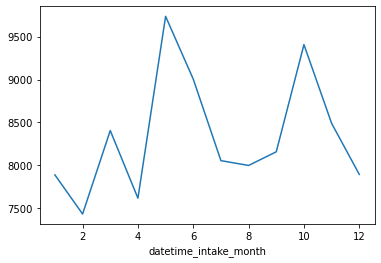

In [61]:
monthly = df_i_o.groupby('datetime_intake_month').size().sort_index()
monthly.plot.line()

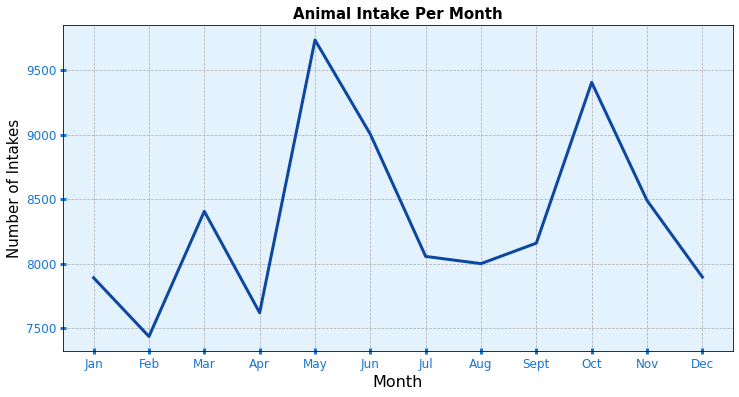

In [62]:
monthly = df_i_o.groupby('datetime_intake_month').size().sort_index()
# Plot the findings to make the months with higher and lower intakes more obvious.
chrt = monthly.plot(kind='line', figsize=(12, 6), color="#0d47a1", use_index=True, lw=3)
chrt.set_title('Animal Intake Per Month', fontsize=15, fontweight="bold")
chrt.set_xlabel('Month', fontsize=16)
chrt.set_ylabel('Number of Intakes', fontsize=15)
chrt.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) # Need to avoid FixedFormatter warning
xlbl_mos = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
chrt.set_xticklabels(xlbl_mos)
chrt.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")
chrt.grid(True, ls="dashed", lw=".75")
chrt.set_facecolor('#e3f2fd')

In [65]:
monthly_adoptions = df_i_o[df_i_o['outcome_type']=='Adoption'].groupby('datetime_intake_month').size().sort_index()
monthly_adoptions

datetime_intake_month
1     3549
2     3353
3     3269
4     3146
5     4248
6     4103
7     3557
8     3487
9     3463
10    3964
11    3596
12    3519
dtype: int64

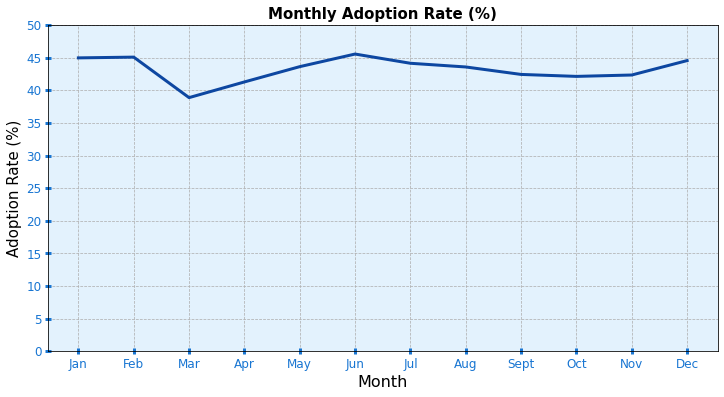

In [80]:
monthly_adoptions = df_i_o[df_i_o['outcome_type']=='Adoption'].groupby('datetime_intake_month').size().sort_index()
monthly_adoption_rate = (monthly_adoptions/monthly)*100
# Plot the findings to make the months with higher and lower intakes more obvious.
chrt2 = monthly_adoption_rate.plot(kind='line', figsize=(12, 6), color="#0d47a1", use_index=True, lw=3)
chrt2.set_title('Monthly Adoption Rate (%)', fontsize=15, fontweight="bold")
chrt2.set_xlabel('Month', fontsize=16)
chrt2.set_ylabel('Adoption Rate (%)', fontsize=15)
chrt2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) # Need to avoid FixedFormatter warning
chrt2.set_xticklabels(xlbl_mos)
chrt2.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")
chrt2.grid(True, ls="dashed", lw=".75")
chrt2.set_facecolor('#e3f2fd')
chrt2.set_yticks([0,5,10,15,20,25,30,35,40,45,50])

This next example brought to you by sheer force of will and Narragansett.

Let's look at the distribution of outcome types by month using an area plot.

In [67]:
"""First, we're going to need the numerator for every month, 
which is the number of each type of outcome"""
df_i_o.groupby(['datetime_intake_month','outcome_type'])['outcome_type'].count()

datetime_intake_month  outcome_type   
1                      Adoption           3549
                       Died                 38
                       Disposal             14
                       Euthanasia          424
                       Missing               3
                                          ... 
12                     Euthanasia          440
                       Missing               3
                       Return to Owner    2120
                       Rto-Adopt            30
                       Transfer           1737
Name: outcome_type, Length: 104, dtype: int64

In [69]:
toople = (1,'Adoption')

In [70]:
toople[0]

1

In [68]:
#the denominator will be the total number of outcomes that month.
df_i_o.groupby(['datetime_intake_month','outcome_type'])['outcome_type'].count().groupby(level=[0]).sum()

datetime_intake_month
1     7888
2     7434
3     8404
4     7619
5     9734
6     9004
7     8056
8     7996
9     8156
10    9406
11    8488
12    7895
Name: outcome_type, dtype: int64

In [71]:
#put them together
monthly_outcomes = df_i_o.groupby(['datetime_intake_month','outcome_type'])['outcome_type'].count()/df_i_o.groupby(['datetime_intake_month','outcome_type'])['outcome_type'].count().groupby(level=[0]).sum()
monthly_outcomes

datetime_intake_month  outcome_type   
1                      Adoption           0.449924
                       Died               0.004817
                       Disposal           0.001775
                       Euthanasia         0.053753
                       Missing            0.000380
                                            ...   
12                     Euthanasia         0.055731
                       Missing            0.000380
                       Return to Owner    0.268524
                       Rto-Adopt          0.003800
                       Transfer           0.220013
Name: outcome_type, Length: 104, dtype: float64

In [72]:
#wizardry
m_o_unstack = monthly_outcomes.unstack().fillna(0)
m_o_unstack

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
datetime_intake_month,,,,,,,,,
1,0.449924,0.004817,0.001775,0.053753,0.000380,0.000127,0.278778,0.003803,0.206643
2,0.451036,0.004439,0.003766,0.067124,0.000135,0.000000,0.264999,0.003497,0.205004
3,0.388981,0.009400,0.006069,0.112327,0.000476,0.000119,0.260471,0.004165,0.217991
4,0.412915,0.005906,0.002625,0.071925,0.000525,0.000131,0.229426,0.002888,0.273658
5,0.436408,0.009760,0.000925,0.062256,0.001438,0.000411,0.212143,0.002466,0.274194
6,0.455686,0.011773,0.002110,0.064860,0.000333,0.000000,0.176810,0.002443,0.285984
7,0.441534,0.007448,0.001862,0.058342,0.000869,0.000124,0.197244,0.002979,0.289598
8,0.436093,0.006003,0.008879,0.057654,0.000625,0.000000,0.193972,0.002626,0.294147
9,0.424595,0.008092,0.003678,0.048431,0.000858,0.000245,0.208926,0.002575,0.302599


let's check that we did the math right. 

# Every month should add to ...?


In [73]:
# df_i_o.plot.area(x=None, y=None, **kwargs)
m_o_unstack.sum(axis=1)

datetime_intake_month
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
dtype: float64

<AxesSubplot:xlabel='datetime_intake_month'>

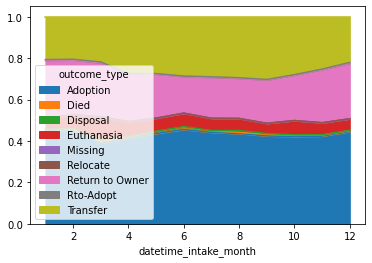

In [74]:
#pandas default behavior
m_o_unstack.plot.area()

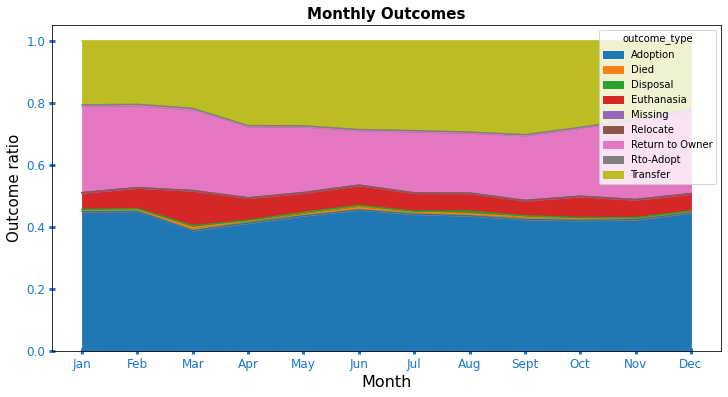

In [75]:
# let's gussy that up
chrt3 = m_o_unstack.plot(kind='area', figsize=(12, 6))
chrt3.set_title('Monthly Outcomes', fontsize=15, fontweight="bold")
chrt3.set_xlabel('Month', fontsize=16)
chrt3.set_ylabel('Outcome ratio', fontsize=15)
chrt3.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) # Need to avoid FixedFormatter warning
chrt3.set_xticklabels(xlbl_mos)
chrt3.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")

# Let's think about storage.

In [76]:
df_i_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100096 entries, 0 to 100095
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   age_upon_intake        100096 non-null  object         
 1   animal_id              100096 non-null  object         
 2   animal_type            100096 non-null  object         
 3   breed                  100096 non-null  object         
 4   color                  100096 non-null  object         
 5   datetime_intake        100096 non-null  datetime64[ns] 
 6   found_location         100096 non-null  object         
 7   intake_condition       100096 non-null  object         
 8   intake_type            100096 non-null  object         
 9   name                   100096 non-null  object         
 10  sex_upon_intake        100095 non-null  object         
 11  age_upon_outcome       100093 non-null  object         
 12  date_of_birth          100096 

The data came to us as relation tables for intakes and outcomes. It went from ~16MB of memory to ~14MB of memory with some dedup, merge, cleaning. Then we engineered some features.

It's back over 18MB, but to be fair we didn't delete some redundant/unnecessary columns.

# How should we break this down for storage?

List the things:
* delete 'age_upon_intake'...
* break data into fundamental elements and store procedures
* 

# For Funsies

In teams of 2, let's work some analysis problems and then visualize them.

1. What is the average stay duration by animal type?
2. What is the average stay duration by age for dogs and cats?
3. What is the average stay duration by 5 most common dog breeds?
3. What is the most common outcome by age class?

[pandas docs: visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html?highlight=str%20split)